In [38]:
import pandas as pd
import numpy as np
import re
import seaborn as sns


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [39]:


true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")

In [40]:
true['Label']=1
false['Label']=0
true 


,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [41]:
data=pd.concat([true,false],axis=0)
data=data.sample(frac=1)

In [42]:
data.reset_index(inplace=True)


In [43]:
data.head()

,index,title,text,subject,date,Label
0,6666,FREAK OUT: Republicans Will HATE That This Fa...,Comedian and actor Will Ferrell has been cast ...,News,"April 27, 2016",0
1,3496,"Texas Governor signs Dallas, Houston pension b...",(Reuters) - Texas Governor Greg Abbott signed ...,politicsNews,"May 31, 2017",1
2,14909,U.S. to fight Islamic State in Syria 'as long ...,WASHINGTON (Reuters) - The U.S. military will ...,worldnews,"November 14, 2017",1
3,8142,Ted Cruz Gets His A** Handed To Him By Rachel...,Rachel Maddow noticed Ted Cruz bragging about ...,News,"February 13, 2016",0
4,15269,(VIDEO) UNIVISION’S JORGE RAMOS GETS A TONGUE ...,A mystery man gives Univision anchor Jorge Ram...,politics,"Aug 26, 2015",0


In [44]:

data.isnull().sum()

index      0
title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [45]:
data=data.drop(['title','subject','date','index'],axis=1)

In [46]:
data.head(5)

,text,Label
0,Comedian and actor Will Ferrell has been cast ...,0
1,(Reuters) - Texas Governor Greg Abbott signed ...,1
2,WASHINGTON (Reuters) - The U.S. military will ...,1
3,Rachel Maddow noticed Ted Cruz bragging about ...,0
4,A mystery man gives Univision anchor Jorge Ram...,0


In [47]:
def wordTransform(text):
    text=text.lower()
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    text=re.sub(r'<.*?>','',text)
    text=re.sub(r'[^\w\s]','',text)
    text=re.sub(r'\d','',text)
    text=re.sub(r'\n','',text)
    
    return text

In [48]:
data['text']=data['text'].apply(wordTransform)

In [49]:
data['text']

0        comedian and actor will ferrell has been cast ...
1        reuters  texas governor greg abbott signed int...
2        washington reuters  the us military will fight...
3        rachel maddow noticed ted cruz bragging about ...
4        a mystery man gives univision anchor jorge ram...
                               ...                        
44893    beirut reuters  tribal chiefs are organizing a...
44894    madrid reuters  barcelona boss ernesto valverd...
44895    wikileaks released an email from center for am...
44896    the video from  is a little blurry but the aud...
44897    tune in to the alternate current radio network...
Name: text, Length: 44898, dtype: object

In [50]:
X=data['text']
y=data['Label']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [52]:
print(x_train.shape)
print(x_test.shape)

(31428,)
(13470,)


In [53]:
vector = TfidfVectorizer()
train_vector = vector.fit_transform(x_train)
test_vector=vector.transform(x_test)

In [54]:
print(train_vector.shape)

(31428, 174659)


In [55]:
model_list,accuracy_list,y_pred_list = [], [], []
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
for i,model in models:
     model.fit(train_vector,y_train)
     pred = model.predict(test_vector)
     print(i)
     model_list.append(i)
     accuracy_list.append(accuracy_score(y_test, pred))
     y_pred_list.append(pred)

RF
Logistic Regression


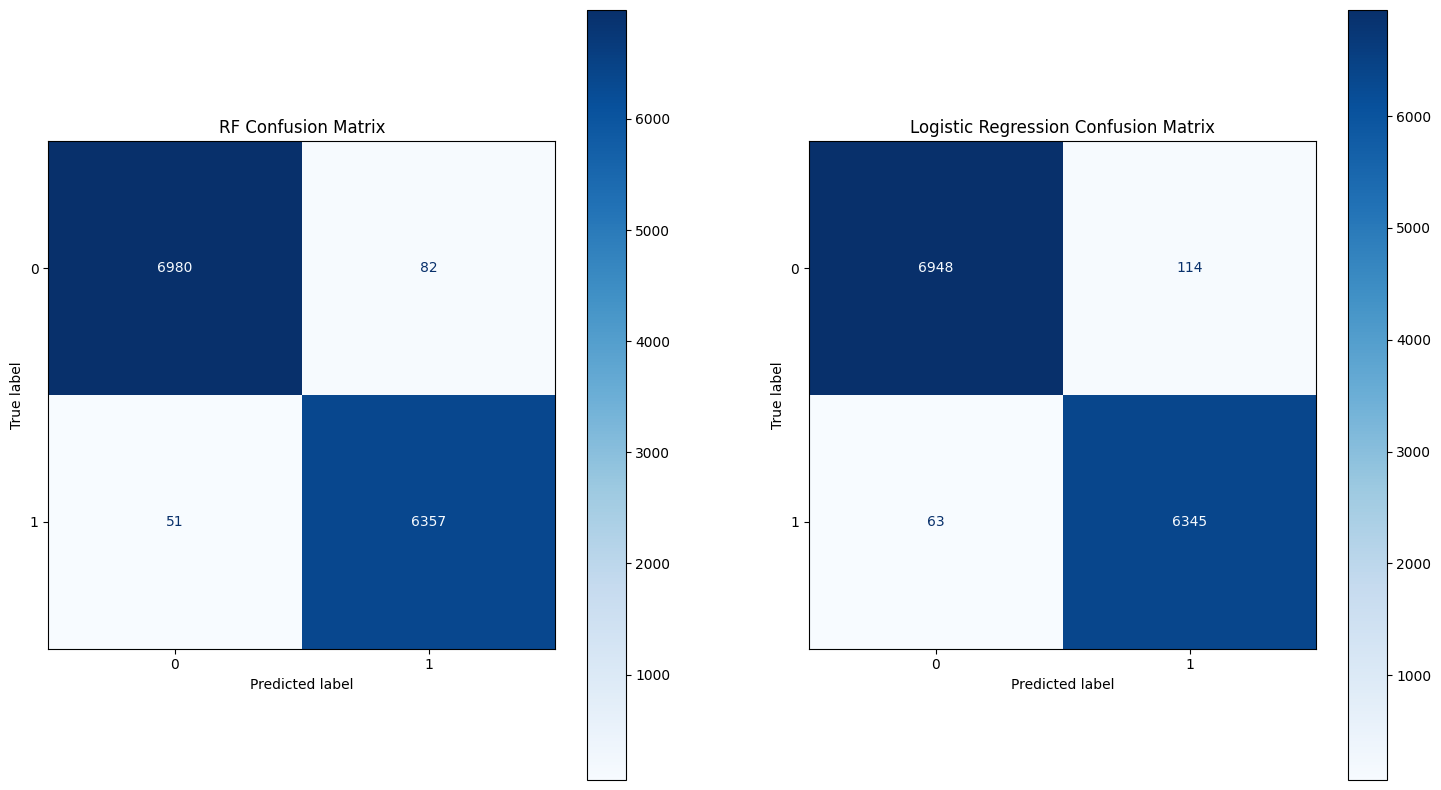

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


num_models = len(model_list)

fig, axes = plt.subplots(1, num_models,figsize=(18, 10))  
if num_models == 1:
    axes = [axes]  

# Plot confusion matrix 
for i, (ax, model_name) in enumerate(zip(axes, model_list)):
    cm = confusion_matrix(y_test, y_pred_list[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(f'{model_name} Confusion Matrix')

plt.show()


In [65]:
test_text = "On January 20, Donald Trump was sworn in as the 45th President of the United States. His inauguration followed a divisive campaign and marked a significant shift in U.S. politics."
test_text2="A bizarre conspiracy theory dubbed pizzagate is making waves again in 2017, spreading across social media platforms and fueling baseless claims about a child trafficking ring tied to prominent Democratic politicians, including Hillary Clinton"
preprocessed_text = wordTransform(test_text)
preprocessed_text2 = wordTransform(test_text2)

# Transform the input text into a vector
test_vector = vector.transform([preprocessed_text])
test_vector2=vector.transform([preprocessed_text2])

# Predict with each trained model
for i, model in models:
    prediction = model.predict(test_vector)
    print(f"{i}: Prediction for '{test_text}' is {'True' if prediction[0] == 1 else 'Fake'}")
    prediction = model.predict(test_vector2)
    print(f"{i}: Prediction for '{test_text2}' is {'True' if prediction[0] == 1 else 'Fake'}")

RF: Prediction for 'On January 20, Donald Trump was sworn in as the 45th President of the United States. His inauguration followed a divisive campaign and marked a significant shift in U.S. politics.' is True
RF: Prediction for 'A bizarre conspiracy theory dubbed pizzagate is making waves again in 2017, spreading across social media platforms and fueling baseless claims about a child trafficking ring tied to prominent Democratic politicians, including Hillary Clinton' is Fake
Logistic Regression: Prediction for 'On January 20, Donald Trump was sworn in as the 45th President of the United States. His inauguration followed a divisive campaign and marked a significant shift in U.S. politics.' is True
Logistic Regression: Prediction for 'A bizarre conspiracy theory dubbed pizzagate is making waves again in 2017, spreading across social media platforms and fueling baseless claims about a child trafficking ring tied to prominent Democratic politicians, including Hillary Clinton' is Fake


In [ ]:
#random forest
print(accuracy_score(y_test,y_pred_list[0]))
#logistic regression
print(accuracy_score(y_test,y_pred_list[1]))


0.9901262063845583
0.9868596881959911
